In [1]:
import numpy as np
from scipy.integrate import odeint
import qutip as qt
import matplotlib.pyplot as plt

In [81]:
ħ = 2
k = 0.5
v = np.linspace(-20,20,101)
Ω = 7
δ = -10
δm = δ-k*v
δp = δ+k*v
Γ = 20

In [82]:
g = qt.basis(2,0)
e = qt.basis(2,1)
σ = g*e.dag()
L = Γ*qt.lindblad_dissipator(σ)

In [83]:
def H(Ω,δ):
    return (ħ*Ω/2)*(σ+σ.dag())-ħ*δ*e*e.dag()

In [84]:
ρm = []
ρp = []
for i in range(len(v)):
    ρm.append(qt.steadystate(H(Ω,δm[i]), [L]))
    ρp.append(qt.steadystate(H(Ω,δp[i]), [L]))

In [85]:
ρm[50]   # Es para v=0 y es igual a ρp[500]

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.9180602 +0.j         -0.23411371+0.11705686j]
 [-0.23411371-0.11705686j  0.0819398 +0.j        ]]

In [86]:
ρee = (Ω/Γ)**2/(1+(2*δ/Γ)**2+2*(Ω/Γ)**2)
ρeg = -1j*(Ω/Γ)*(1+2j*δ/Γ)/(1+(2*δ/Γ)**2+2*(Ω/Γ)**2)

In [87]:
qt.Qobj([[1-ρee,np.conj(ρeg)],[ρeg,ρee]])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.9454343+0.j       -0.155902 +0.155902j]
 [-0.155902 -0.155902j  0.0545657+0.j      ]]

In [9]:
Fopm = []
Fopp = []
for i in range(len(v)):
    Fopm.append((1j/ħ)*qt.commutator(H(Ω,δm[i]), qt.momentum(2)))
    Fopp.append((1j/ħ)*qt.commutator(H(Ω,δp[i]), qt.momentum(2)))

In [10]:
F = []
for i in range(len(v)):
    F.append(-(ρm[i]*Fopm[i]).tr()+(ρp[i]*Fopp[i]).tr())

In [11]:
Fa = (ħ*k*Ω**2/Γ)*(1/(1+2*Ω**2/Γ**2+4*δm**2/Γ**2)-1/(1+2*Ω**2/Γ**2+4*δp**2/Γ**2))

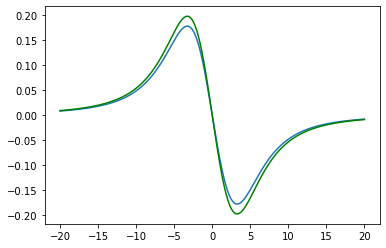

In [13]:
plt.plot(v,F)
plt.plot(v,Fa, color='green')
plt.show()